<a href="https://colab.research.google.com/github/Shrushti-2002/Sales-Prediction-Using-Python/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


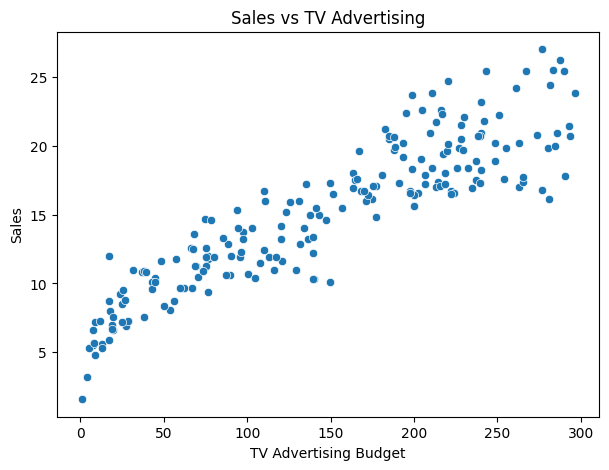

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["TV"], y=df["Sales"])
plt.title("Sales vs TV Advertising")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

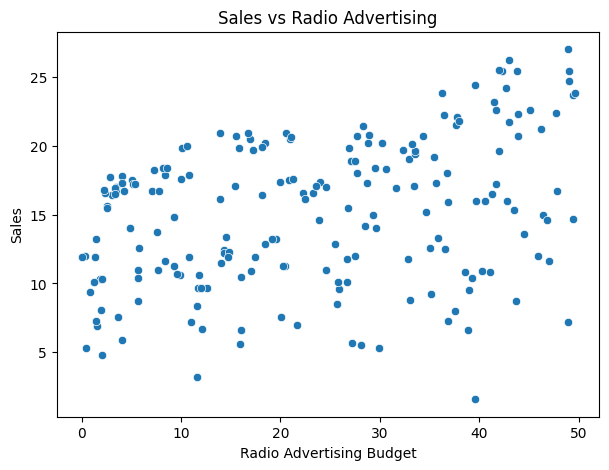

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Radio"], y=df["Sales"])
plt.title("Sales vs Radio Advertising")
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Sales")
plt.show()

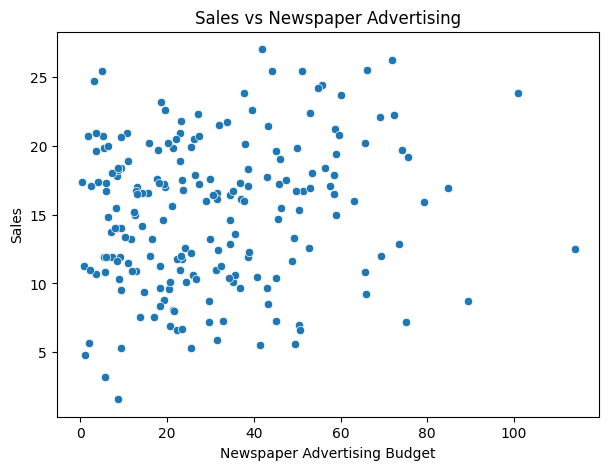

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Newspaper"], y=df["Sales"])
plt.title("Sales vs Newspaper Advertising")
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.show()

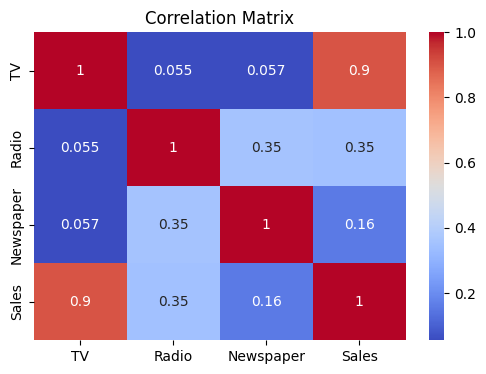

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 1.2748262109549338
RMSE: 1.7052146229349223
R² Score: 0.9059011844150826


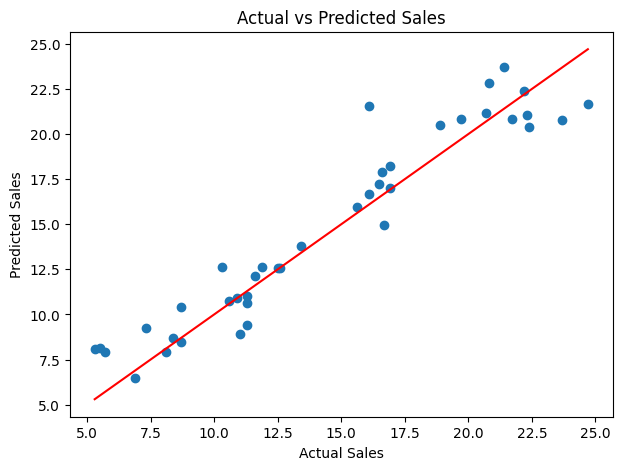

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

In [14]:
new_data = pd.DataFrame({
    "TV": [200],
    "Radio": [40],
    "Newspaper": [30]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 19.783894470037335
